Library

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Dataset

In [32]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

In [33]:
bc.target.shape

(569,)

In [34]:
bc.data.shape

(569, 30)

preprocessing

In [35]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(bc.data , bc.target , test_size=0.2)

print(f"feature=>train:{x_train.shape},test:{x_test.shape}")
print(f"label=>train:{y_train.shape},test:{y_test.shape}")

feature=>train:(455, 30),test:(114, 30)
label=>train:(455,),test:(114,)


Preprocessing

In [36]:
from sklearn.preprocessing import MinMaxScaler

Scaler = MinMaxScaler(feature_range=(0,1))

x_train = Scaler.fit_transform(x_train)
x_test = Scaler.fit_transform(x_test)


Classification

In [37]:
from sklearn.metrics import recall_score , accuracy_score , precision_score
def calculate_metrics (y_train , y_test , y_pred_train , y_pred_test):

    acc_train = accuracy_score(y_true=y_train , y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test , y_pred=y_pred_test)
    
    p = precision_score(y_true=y_test , y_pred=y_pred_test)
    r = recall_score(y_true=y_test , y_pred=y_pred_test)

    print(f"acc_train:{acc_train} , acc_test:{acc_test} ,precision :{p} ,recall:{r}")
    return acc_train , acc_test , p ,r

1.Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB

nbg = GaussianNB()
nbg.fit(x_train , y_train)

y_pred_train = nbg.predict(x_train)
y_pred_test = nbg.predict(x_test)

acc_train_nbg , acc_test_nbg , p_nbg , r_nbg = calculate_metrics(y_train , y_test , y_pred_train , y_pred_test)

acc_train:0.9340659340659341 , acc_test:0.9210526315789473 ,precision :0.9705882352941176 ,recall:0.9041095890410958


2.KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8 , algorithm='kd_tree' , leaf_size=28)
knn.fit(x_train , y_train)

y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

acc_train_knn , acc_test_knn , p_knn , r_knn = calculate_metrics(y_train , y_test , y_pred_train , y_pred_test)

acc_train:0.9714285714285714 , acc_test:0.9736842105263158 ,precision :0.9861111111111112 ,recall:0.9726027397260274


3.Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=64 , min_samples_split=4 , criterion='gini')
dt.fit(x_train , y_train)

y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

acc_train_dt , acc_test_dt , p_dt , r_dt = calculate_metrics(y_train , y_test , y_pred_train , y_pred_test)


acc_train:0.9956043956043956 , acc_test:0.9298245614035088 ,precision :0.9850746268656716 ,recall:0.9041095890410958


4.Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000 ,max_depth=32, criterion='entropy',min_samples_split=4)
rf.fit(x_train , y_train)

y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train_rf , acc_test_rf , p_rf , r_rf = calculate_metrics(y_train , y_test , y_pred_train , y_pred_test)


acc_train:1.0 , acc_test:0.9385964912280702 ,precision :0.9852941176470589 ,recall:0.9178082191780822


5.SVM

In [55]:
from sklearn.svm import SVC

svm = SVC(kernel='poly')
svm.fit(x_train , y_train)

y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

acc_train_svm , acc_test_svm , p_svm , r_svm = calculate_metrics(y_train , y_test , y_pred_train , y_pred_test)


acc_train:0.9868131868131869 , acc_test:0.9824561403508771 ,precision :0.9863013698630136 ,recall:0.9863013698630136


6.Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression( )
lr.fit(x_train , y_train)

y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

acc_train_lr , acc_test_lr , p_lr , r_lr = calculate_metrics(y_train , y_test , y_pred_train , y_pred_test)

acc_train:0.9736263736263736 , acc_test:0.9736842105263158 ,precision :0.9861111111111112 ,recall:0.9726027397260274


7.ANN

In [58]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=256 , activation='tanh')
ann.fit(x_train , y_train)

y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

acc_train_ann , acc_test_ann , p_ann , r_ann = calculate_metrics(y_train , y_test , y_pred_train , y_pred_test)


acc_train:0.978021978021978 , acc_test:0.9649122807017544 ,precision :0.9859154929577465 ,recall:0.958904109589041


c:\Users\ASUS\Desktop\gitprj\venv3120\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Comparision

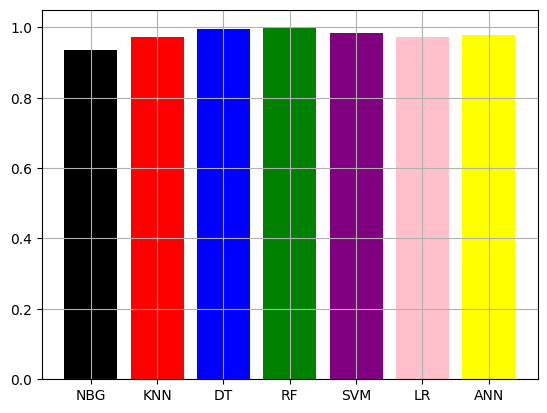

In [63]:
acc_train = [acc_train_nbg , acc_train_knn , acc_train_dt , acc_train_rf , acc_test_svm , acc_train_lr , acc_train_ann]
titlle = ['NBG' , 'KNN' , 'DT', 'RF' , 'SVM' , 'LR' , 'ANN']
color = ['black','red','blue','green','purple','pink','yellow']
plt.bar(titlle , acc_train , color=color)
plt.grid()
plt.show()

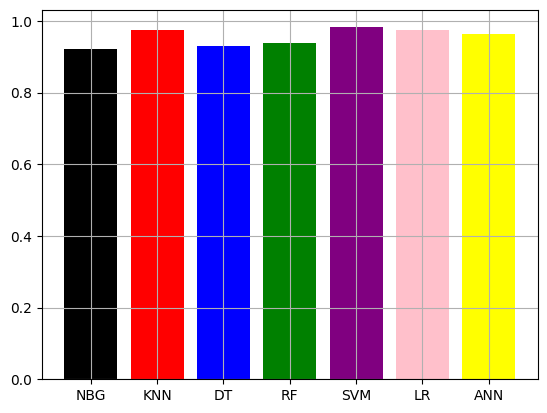

In [64]:
acc_test = [acc_test_nbg , acc_test_knn , acc_test_dt , acc_test_rf , acc_test_svm , acc_test_lr , acc_test_ann]
titlle = ['NBG' , 'KNN' , 'DT', 'RF' , 'SVM' , 'LR' , 'ANN']
color = ['black','red','blue','green','purple','pink','yellow']
plt.bar(titlle , acc_test , color=color)
plt.grid()
plt.show()


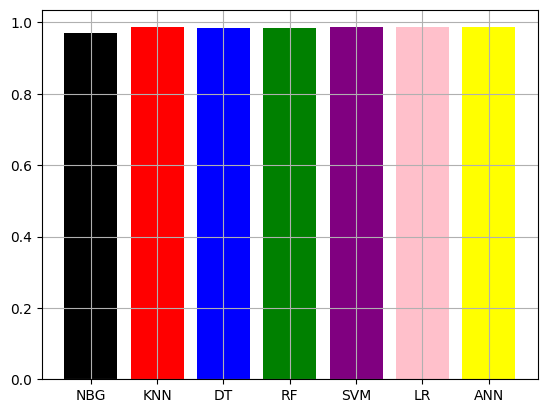

In [65]:
p = [p_nbg ,p_knn , p_dt , p_rf , p_svm , p_lr , p_ann]
titlle = ['NBG' , 'KNN' , 'DT', 'RF' , 'SVM' , 'LR' , 'ANN']
color = ['black','red','blue','green','purple','pink','yellow']
plt.bar(titlle , p , color=color)
plt.grid()
plt.show()


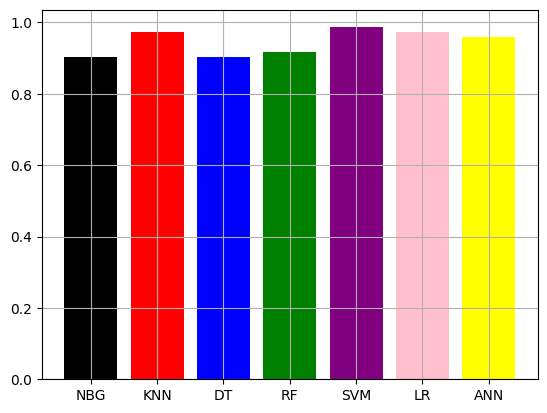

In [66]:
r= [r_nbg ,r_knn , r_dt , r_rf , r_svm , r_lr , r_ann]
titlle = ['NBG' , 'KNN' , 'DT', 'RF' , 'SVM' , 'LR' , 'ANN']
color = ['black','red','blue','green','purple','pink','yellow']
plt.bar(titlle , r , color=color)
plt.grid()
plt.show()
